# IA006 - Exercícios de Fixação de Conceitos
# EFC 2 - 1s2019

## Pedro Mariano Sousa Bezerra           RA: 118383

### Parte 1 - Teoria bayesiana de decisão

As funções de densidade de probabilidade para as distribuições do problema são dadas por:

$$p(x|C_1) = \frac{1}{\sqrt{2\pi}} \exp\left[\frac{-x^2}{2}\right]$$

$$p(x|C_2) = \frac{1}{2\sqrt{\pi}} \exp\left[\frac{-x^2}{4}\right]$$

**a)** Pelo critério de máxima verossimilhança, um dado obtido $x'$ é considerado pertencente à classe $C_1$ se a seguinte condição for satisfeita:

$$ p(x'|C_1) > p(x'|C_2) \Leftrightarrow \frac{1}{\sqrt{2\pi}} \exp\left[\frac{-x'^2}{2}\right] > \frac{1}{2\sqrt{\pi}} \exp\left[\frac{-x'^2}{4}\right] \Leftrightarrow $$

$$ \Leftrightarrow  \exp\left[\frac{-x'^2}{2}+\frac{x'^2}{4}\right] > \frac{\sqrt{2}}{2} \Leftrightarrow -\frac{x'^2}{4} >  -\frac{1}{2}\ln(2) \Leftrightarrow x'^2 - 2 \ln(2) < 0$$

Assim, segue que $x'$ pertence à classe $C_1$ se $-\sqrt{2 \ln(2)} < x' < \sqrt{2 \ln(2)}$, e pertence à classe $C_2$ caso contrário.

**b)** Pelo critério MAP, decidiremos pela classe $C_1$ caso a condição a seguir seja verificada:

$$ p(C_1|x') > p(C_2|x') \Leftrightarrow p(x'|C_1)P(C_1) > p(x'|C_2)P(C_2) $$

Como $P(C_1) = 2P(C_2)$, a condição torna-se:

$$ 2p(x'|C_1) > p(x'|C_2) \Leftrightarrow \frac{2}{\sqrt{2\pi}} \exp\left[\frac{-x'^2}{2}\right] > \frac{1}{2\sqrt{\pi}} \exp\left[\frac{-x'^2}{4}\right] \Leftrightarrow $$

$$ \Leftrightarrow \exp\left[\frac{-x'^2}{2}+\frac{x'^2}{4}\right] > \frac{\sqrt{2}}{4} \Leftrightarrow -\frac{x'^2}{4} > -\frac{3}{2} \ln(2) \Leftrightarrow x'^2 - 6 \ln(2) < 0$$

Assim, segue que $x'$ pertence à classe $C_1$ se $-\sqrt{6 \ln(2)} < x' < \sqrt{6 \ln(2)}$, e pertence à classe $C_2$ caso contrário.

**c)** O critério de máxima verossimilhança é equivalente ao critério MAP quando as classes são equiprováveis. No segundo caso, quando há uma probabilidade *a priori* maior para a classe $C_1$, observa-se que o intervalo de valores para o qual decidimos por essa classe é maior do que no caso de classes equiprováveis.

### Parte 2 - Classificação binária

**a)** A figura a seguir mostra a distribuição dos padrões no espaço original dos dados. Tal distribuição revela uma separação evidente entre as duas classes de dados no espaço bidimensional, uma vez que as regiões onde os dados de cada classe estão densamente distribuídos são visivelmente distintas e não há sobreposição entre elas. No entanto, os dados não são linearmente separáveis, uma vez que não é possível obter uma reta que divida o plano em regiões onde estejam presentes apenas dados de uma dada classe. Logo, a curva de separação das classes é não-linear.

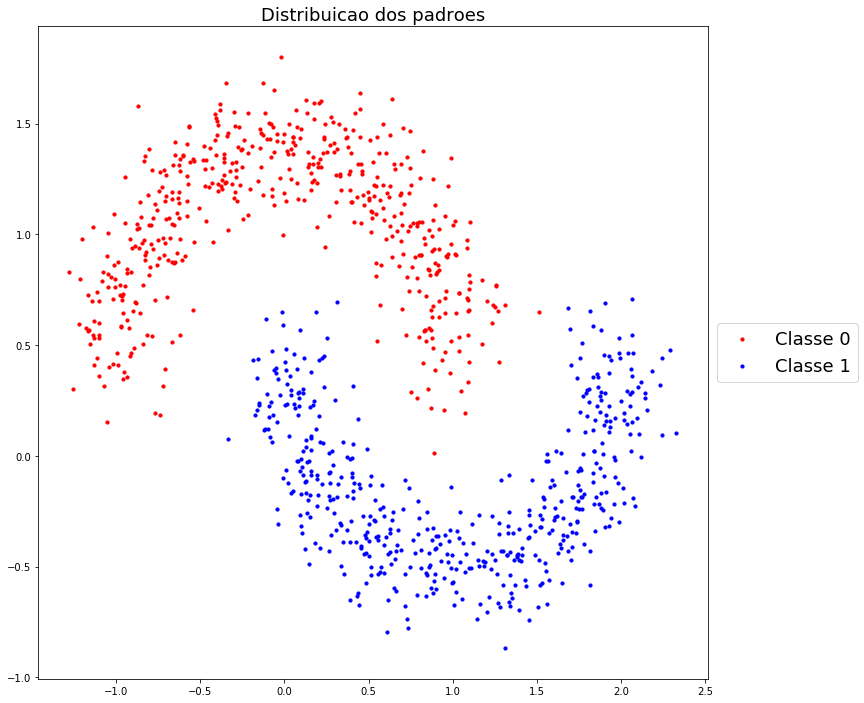

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('two_moons.csv',delimiter=',',skiprows=1,usecols=np.arange(3)+1)

class0 = np.where(data[:,2]==0)[0]
class1 = np.where(data[:,2]==1)[0]

plt.figure(figsize=(12, 12))
plt.scatter(data[class0,0],data[class0,1],color='r',label='Classe 0',s=10)
plt.scatter(data[class1,0],data[class1,1],color='b',label='Classe 1',s=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.title('Distribuicao dos padroes', fontsize=18)
plt.show()

**b)** O trecho de código a seguir calcula a direção ótima de projeção do discriminante linear de Fisher. Em seguida, a direção encontrada é mostrada junto com os dados originais.

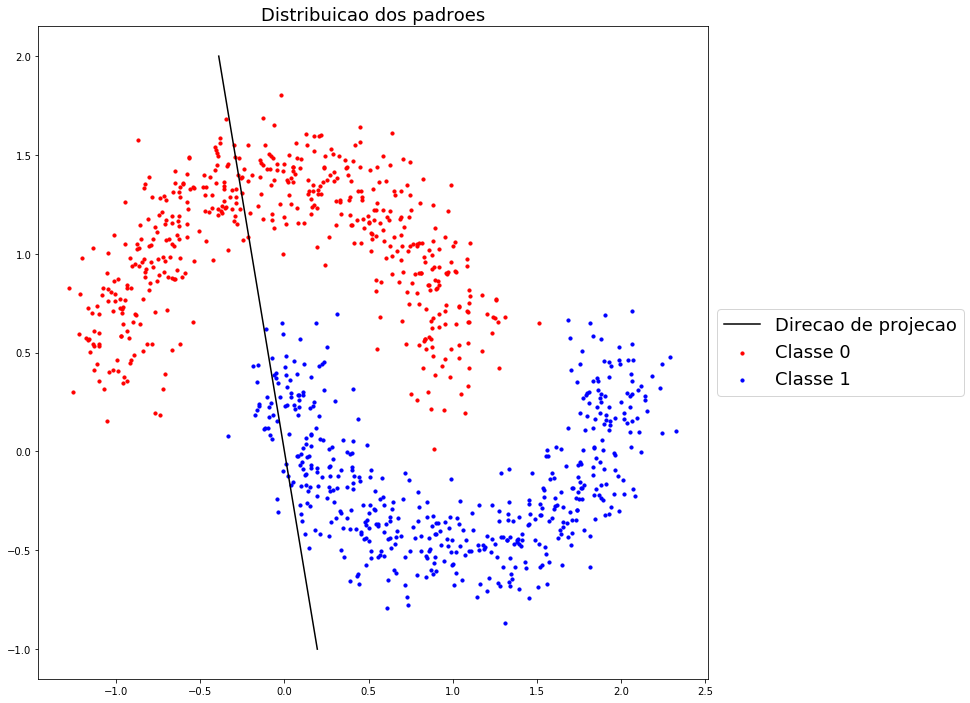

In [2]:
# Calculo da media e variancia intra-classe

def var_intra(x):
    
    mx = np.mean(x,axis=0)
    d = x - mx
    s = d.transpose().dot(d)
    
    return mx,s

m0,s0 = var_intra(data[class0,:-1]) # Media e varianca da classe 0
m1,s1 = var_intra(data[class1,:-1]) # Media e varianca da classe 1

sw = s0 + s1 # Variancia intra-classe

w = np.linalg.solve(sw,m0-m1) # Direcao otima do discriminante de Fischer
w =  w/np.linalg.norm(w) # Normalizacao

liney = np.array([2.0,-1.0])
linex = liney/w[1]*w[0]

plt.figure(figsize=(12, 12))
plt.scatter(data[class0,0],data[class0,1],color='r',label='Classe 0',s=10)
plt.scatter(data[class1,0],data[class1,1],color='b',label='Classe 1',s=10)
plt.plot(linex,liney,color='k',label='Direcao de projecao')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.title('Distribuicao dos padroes', fontsize=18)
plt.show()

A seguir, apresentamos a projeção dos dados disponíveis na direção ótima encontrada (com um pequeno espaçamento entre dados de classes diferentes para facilitar a visualização), bem como os histogramas das classes projetadas.

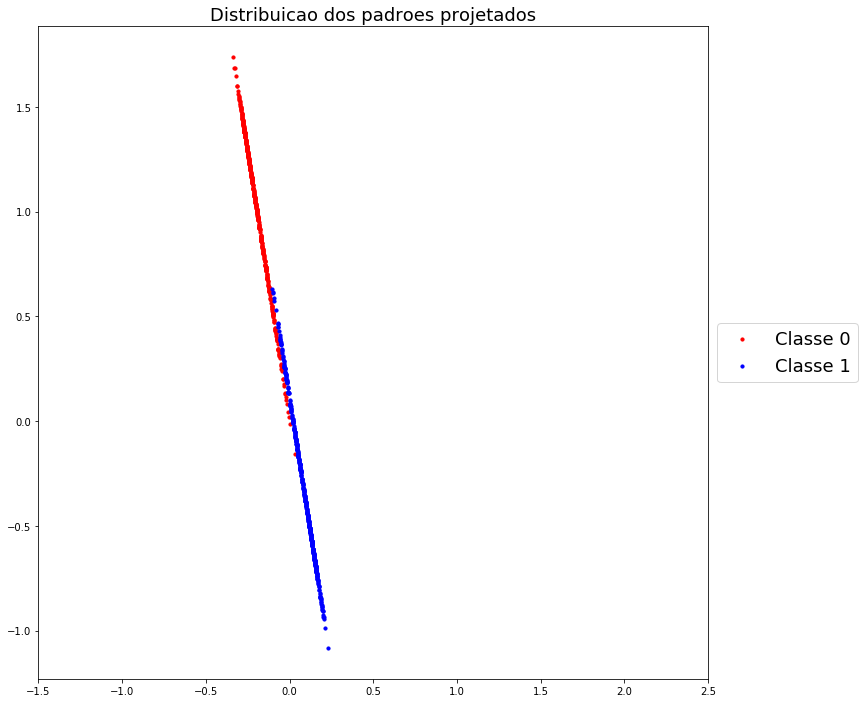

In [3]:
proj = w.dot(data[:,:-1].T) # Dados projetados no espaco reduzido

N = len(data)

projdata = np.zeros((N,2))

for i in np.arange(N):
    
    projdata[i,:] = proj[i]*w # Dados projetados na direcao otima
    
plt.figure(figsize=(12, 12))
plt.scatter(projdata[class0,0],projdata[class0,1],color='r',label='Classe 0',s=10)
plt.scatter(projdata[class1,0]+0.02,projdata[class1,1],color='b',label='Classe 1',s=10)
#plt.scatter(data[class0,0],data[class0,1],color='r',s=10)
#plt.scatter(data[class1,0],data[class1,1],color='b',s=10)
#plt.plot(linex,liney,color='k',label='Direcao de projecao')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.title('Distribuicao dos padroes projetados', fontsize=18)
plt.xlim((-1.5,2.5))
plt.show()

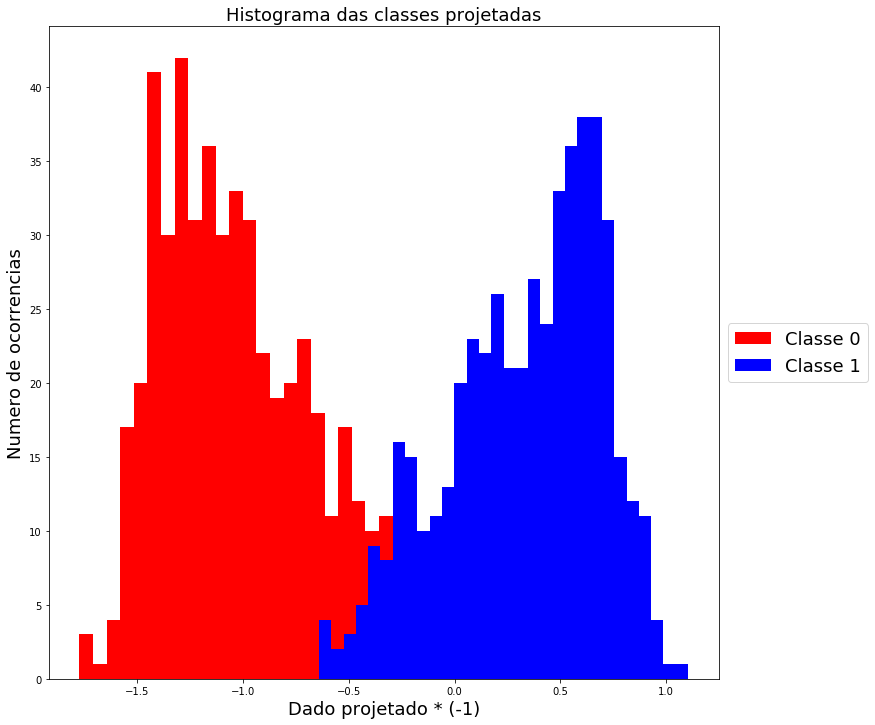

In [4]:
plt.figure(figsize=(12, 12))
plt.hist(-proj[class0],bins=30,color='r',label='Classe 0')
plt.hist(-proj[class1],bins=30,color='b',label='Classe 1')
plt.xlabel('Dado projetado * (-1)', fontsize=18)
plt.ylabel('Numero de ocorrencias', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.title('Histograma das classes projetadas', fontsize=18)
plt.show()

Observamos que há uma pequena região dos dados projetados onde ocorre sobreposição das classes. Entretanto, como mostram os histogramas, a maior parte das projeções está concentrada em regiões distintas para cada classe, como esperado, uma vez que a direção ótima do discriminante linear de Fischer é aquela que maximiza a separação inter-classe e minimiza a separação intra-classe dos dados projetados.

**c)** Para obter a curva ROC, variamos o valor do *threshold* na região onde ocorre sobreposição dos dados projetados e calculamos as métricas. A figura a seguir mostra a curva obtida.

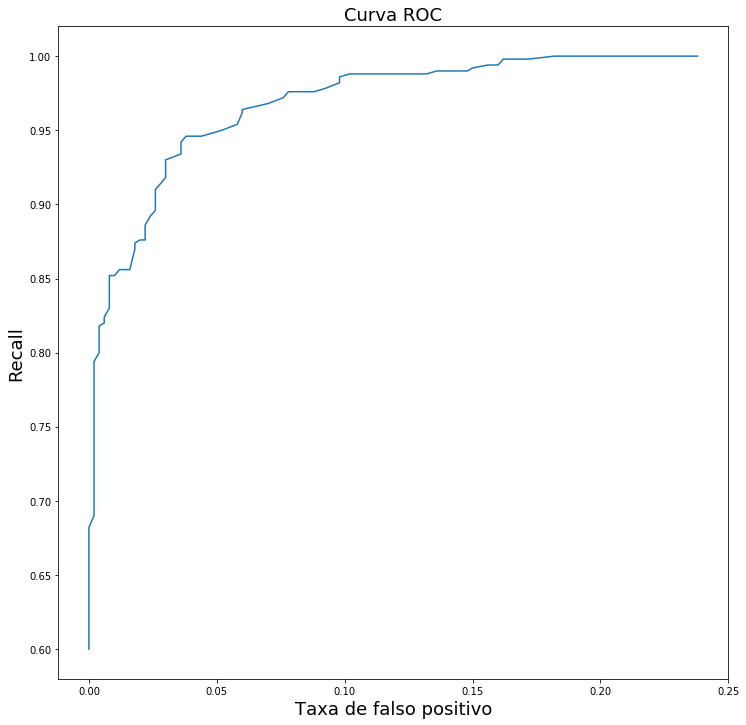

Obtido para 100 amostras de threshold no intervalo [-0.257861,0.741279]


In [5]:
t_min = min(proj[class0]) # Valores extremos para o threshold
t_max = max(proj[class1])

n_tr = 100 # Numero de amostras de threshold
tr = np.linspace(t_min-0.1,t_max+0.1,n_tr) # Valores de threshold
#tr = np.linspace(min(proj),max(proj),n_tr)

recall = np.zeros(n_tr)
tfp = np.zeros(n_tr) # Taxa de falsos positivos
pr = np.zeros(n_tr) # Precisao
f1 = np.zeros(n_tr) # F1-medida

for i in np.arange(n_tr):
    
    class_data = np.zeros(N) # Classificacao dos padroes
    class_data[proj < tr[i]] = 1
    TP = class_data[class1].sum()
    FN = len(class1) - TP
    FP = class_data[class0].sum()
    TN = len(class0) - FP
    recall[i] = TP / (TP + FN)
    tfp[i] = FP / (TN + FP)
    pr[i] = TP / (TP + FP)
    f1[i] = 2*recall[i]*pr[i]/(recall[i]+pr[i])

plt.figure(figsize=(12, 12))
plt.plot(tfp,recall)
plt.title('Curva ROC', fontsize=18)
plt.xlabel('Taxa de falso positivo', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

print 'Obtido para %d amostras de threshold no intervalo [%f,%f]' %(n_tr,t_min-0.1,t_max+0.1)

A curva ROC do classificador obtido está acima da linha diagonal, o que mostra que ele é melhor que um classificador aleatório. A seguir, apresentamos a evolução da $F_1$-medida em função dos valores do *threshold*.

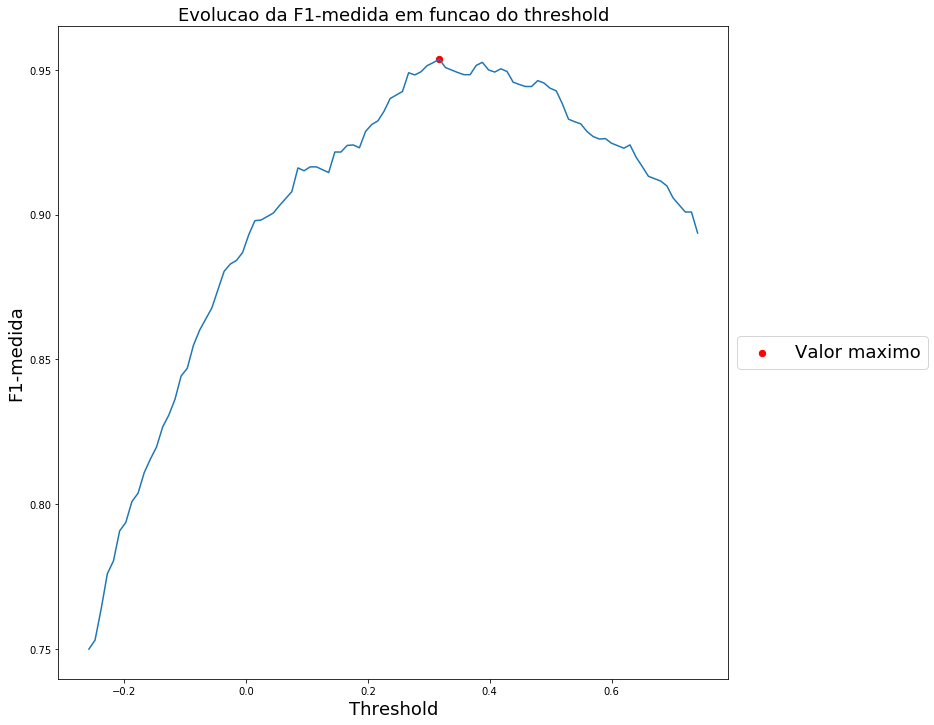

Melhor valor da F1-medida = 0.953629 para threshold = 0.317402
Precisao = 0.961382, Recall = 0.946000


In [6]:
indmax_f1 = np.argmax(f1) # Indice para o maximo da F1-medida
tr_fisc = tr[indmax_f1] # Threshold otimo

plt.figure(figsize=(12, 12))
plt.plot(tr,f1)
plt.title('Evolucao da F1-medida em funcao do threshold', fontsize=18)
plt.scatter(tr[indmax_f1],f1[indmax_f1],label='Valor maximo',color='r',s=40)
plt.xlabel('Threshold', fontsize=18)
plt.ylabel('F1-medida', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.show()

print 'Melhor valor da F1-medida = %f para threshold = %f' % (f1[indmax_f1],tr_fisc)
print 'Precisao = %f, Recall = %f'% (pr[indmax_f1],recall[indmax_f1])

Observamos que o valor da $F_1$-medida apresenta um valor máximo de 0,953629 no intervalo de valores considerados para o *threshold*. Neste caso, obteve-se um valor próximo de 1 para a métrica, o que mostra que o classificador apresentou bons resultados tanto na precisão quanto no *recall*. Conforme o valor do *threshold* se afasta do valor ótimo 0,317402, o desempenho do classificador piora com respeito à $F_1$-medida.

**d)** O trecho de código a seguir executa o treinamento do vetor de parâmetros $\mathbf{w}$ para o modelo de regressão logística. Empregamos a técnica de *holdout*, separando uma amostra aleatória de 30% do conjunto de dados para utilizar como conjunto de validação. Executamos 1000 iterações com taxa de aprendizado 1,0. Apresentamos em seguida a evolução da função de custo $J_{CE}(\mathbf{w})$ ao longo das iterações para os conjuntos de treinamento e de validação.

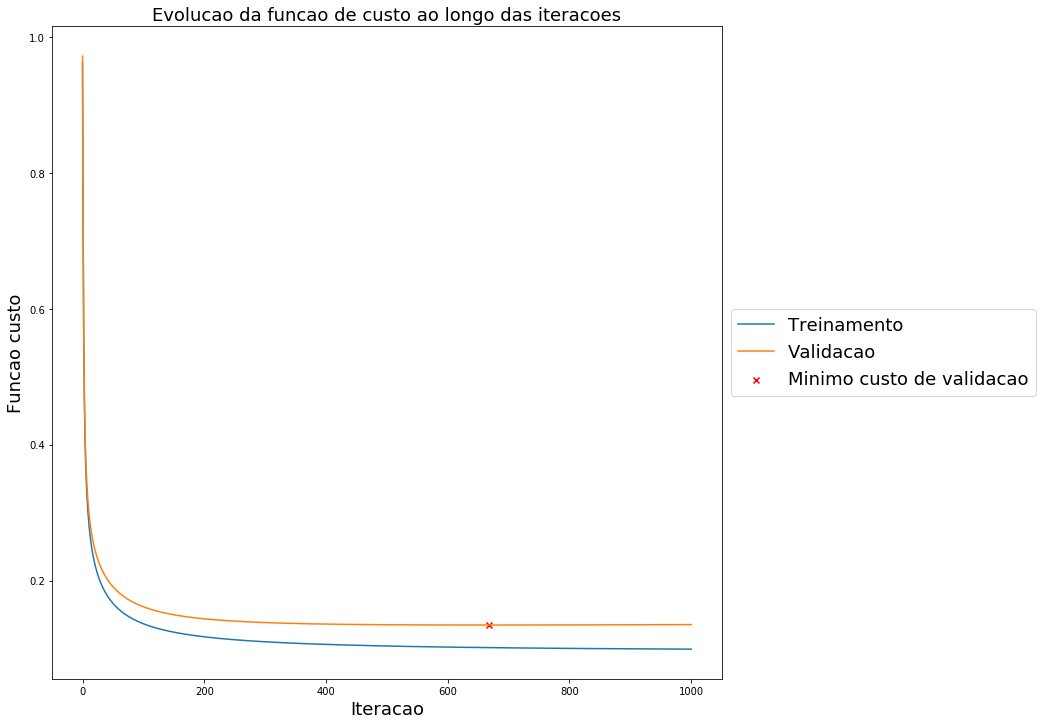

Minimo da funcao custo de validacao = 0.134709 obtido para w = [ 2.89708254  1.31446753 -8.10945914]


In [7]:
phi = np.ones((N,3))
phi[:,1:] = data[:,:-1]

# Holdout

np.random.seed(10)
ind = np.random.permutation(N) # Permutacao aleatoria dos indices da matriz de dados
hold_rate = 0.3 # Porcentagem de amostras para conjunto de validacao
N_val = np.int(hold_rate*N)
ind_val = ind[-np.int(N_val):] # Indices do conjunto de validacao
ind_train = ind[:-np.int(N_val)] # Indices do conjunto de treinamento

alpha = 1.0 # Taxa de aprendizado
n_it = 1000 # Numero maximo de iteracoes
w_log = np.zeros((n_it+1,3))
w_log[0] = np.random.rand(3) # Inicializacao do vetor w
#w_log[0] = np.array([2.58955987,  1.07615076, -6.93794847])
Jce_train = np.zeros(n_it+1) # Funcao custo de treinamento
Jce_val = np.zeros(n_it+1) # Funcao custo de validacao

phi_train = phi[ind_train,:]
phi_val = phi[ind_val,:]

# Avaliacao das funcoes de custo
Jce_train[0] = -(data[ind_train,-1].dot(phi_train).dot(w_log[0])-np.sum(np.log(1+np.exp(phi_train.dot(w_log[0])))))/(N-N_val)
Jce_val[0] = -(data[ind_val,-1].dot(phi_val).dot(w_log[0])-np.sum(np.log(1+np.exp(phi_val.dot(w_log[0])))))/N_val

# Treinamento
for i in np.arange(n_it):
    
    y_hat = 1/(1+np.exp(-phi_train.dot(w_log[i]))) # Saida do modelo
    e = data[ind_train,-1] - y_hat # erro 
    grad = -e.dot(phi_train)/(N - N_val) # vetor gradiente
    w_log[i+1] = w_log[i] - alpha*grad # atualizacao do vetor w
    
    # Avaliacao das funcoes de custo
    Jce_train[i+1] = -(data[ind_train,-1].dot(phi_train).dot(w_log[i+1])-np.sum(np.log(1+np.exp(phi_train.dot(w_log[i+1])))))/(N-N_val)
    Jce_val[i+1] = -(data[ind_val,-1].dot(phi_val).dot(w_log[i+1])-np.sum(np.log(1+np.exp(phi_val.dot(w_log[i+1])))))/N_val

indmin_val = np.argmin(Jce_val)
w_opt = w_log[indmin_val]
    
plt.figure(figsize=(12, 12))
plt.plot(Jce_train,label='Treinamento')
plt.plot(Jce_val,label='Validacao')
plt.title('Evolucao da funcao de custo ao longo das iteracoes', fontsize=18)
plt.scatter(indmin_val,Jce_val[indmin_val],color='r',marker='x',label='Minimo custo de validacao')
plt.xlabel('Iteracao', fontsize=18)
plt.ylabel('Funcao custo', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.show()

print 'Minimo da funcao custo de validacao = %f obtido para w = %s' %(Jce_val[indmin_val],w_opt)


Como podemos observar, o mínimo da função custo $J_{CE}(\mathbf{w})$  para o conjunto de validação não coincide com o mínimo de $J_{CE}(\mathbf{w})$  para o conjunto de treinamento. Na sequência, vamos adotar o valor de $\mathbf{w}$ que minimiza $J_{CE}(\mathbf{w})$  para o conjunto de validação, conforme o ponto destacado na figura anterior.

A seguir, variamos o valor do *threshold* com 100 amostras no intervalo $[0{,}01;0{,}99]$ para obter a curva ROC do modelo de regressão logística.

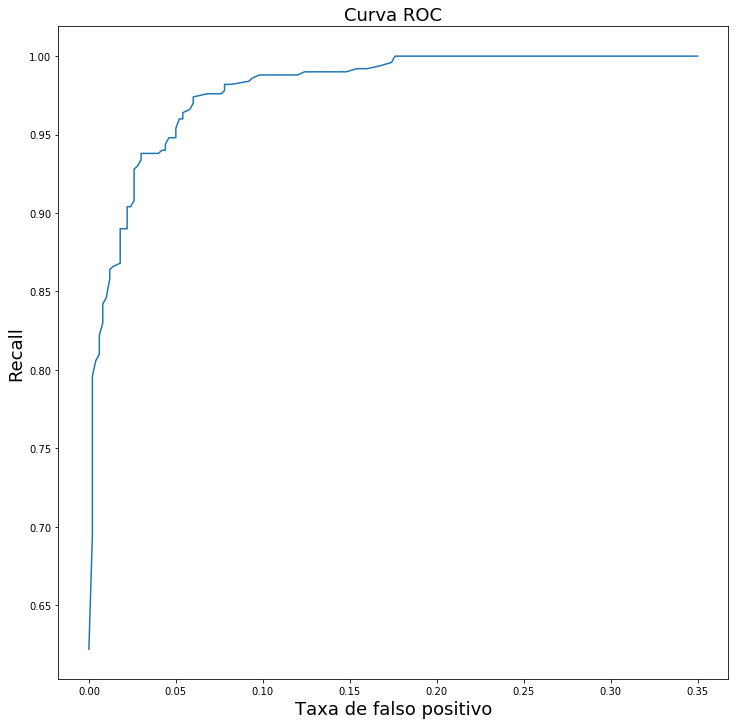

In [8]:
t_min = 0.01 # Valores extremos para o threshold
t_max = 0.99

n_tr = 100 # Numero de amostras de threshold
tr = np.linspace(t_min,t_max,n_tr) # Valores de threshold
#tr = np.linspace(min(proj),max(proj),n_tr)

y_hat = 1/(1+np.exp(-phi.dot(w_opt))) # Saida do modelo da regressao logistica
recall_log = np.zeros(n_tr)
tfp_log = np.zeros(n_tr) # Taxa de falsos positivos
pr_log = np.zeros(n_tr) # Precisao
f1_log = np.zeros(n_tr) # F1-medida

for i in np.arange(n_tr):
    
    class_data_log = np.zeros(N) # Classificacao dos padroes
    class_data_log[y_hat > tr[i]] = 1
    TP = class_data_log[class1].sum()
    FN = len(class1) - TP
    FP = class_data_log[class0].sum()
    TN = len(class0) - FP
    recall_log[i] = TP / (TP + FN)
    tfp_log[i] = FP / (TN + FP)
    pr_log[i] = TP / (TP + FP)
    f1_log[i] = 2*recall_log[i]*pr_log[i]/(recall_log[i]+pr_log[i])

plt.figure(figsize=(12, 12))
plt.plot(tfp_log,recall_log)
plt.title('Curva ROC', fontsize=18)
plt.xlabel('Taxa de falso positivo', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

#print 'Obtido para %d amostras de threshold no intervalo [%f,%f]' %(n_tr,t_min,t_max)

Para efeitos de comparação, vamos exibir as curvas ROC obtidas para os dois modelos na mesma figura e calcular a área sob a curva. Para tal, limitamos as curvas para um intervalo comum de valores de recall e taxa de falso positivo.

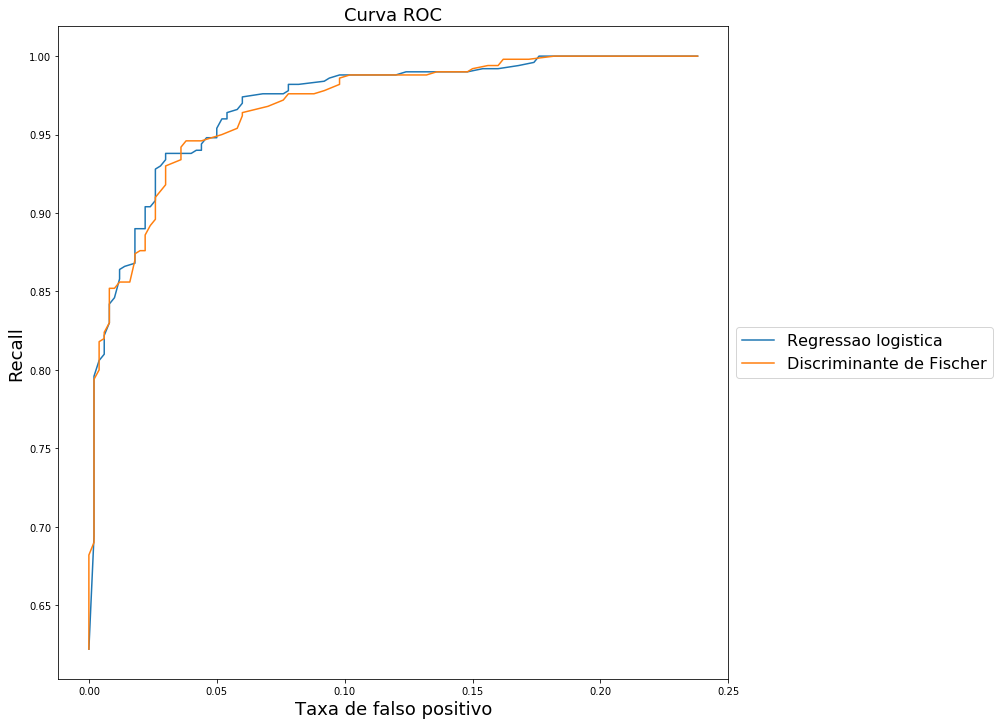

Area sob a curva:
Discriminante de Fischer: 0.230190
Regressao logistica: 0.230628


In [9]:
minrecall = max(min(recall),min(recall_log)) # Recall minimo para ambas as curvas
maxtfp = min(max(tfp),max(tfp_log)) # Taxa de falso positivo maxima para ambas as curvas

# Amostra da curva do discriminante de Fischer
ind_fisc = np.where((recall>= minrecall) & (tfp <=maxtfp))[0] # Indices dos valores que respeitam os limites
tfp_fisc = tfp[ind_fisc]
recall_fisc = recall[ind_fisc]
tfp_fisc[tfp_fisc == max(tfp_fisc)] = maxtfp
recall_fisc[recall_fisc == min(recall_fisc)] = minrecall

# Amostra da curva da regressao logistica
ind_log = np.where((recall_log>= minrecall) & (tfp_log <=maxtfp))[0] # Indices dos valores que respeitam os limites
tfp_log = tfp_log[ind_log]
recall_log = recall_log[ind_log]
tfp_log[tfp_log == max(tfp_log)] = maxtfp
recall_log[recall_log == min(recall_log)] = minrecall

plt.figure(figsize=(12, 12))
plt.plot(tfp_log,recall_log,label='Regressao logistica')
plt.plot(tfp_fisc,recall_fisc,label='Discriminante de Fischer')
plt.title('Curva ROC', fontsize=18)
plt.xlabel('Taxa de falso positivo', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.show()
area_fisc = np.trapz(recall_fisc,tfp_fisc)
area_log = np.trapz(recall_log,tfp_log)

#Calculo da area
print 'Area sob a curva:'
print 'Discriminante de Fischer: %f' % abs(area_fisc)
print 'Regressao logistica: %f' % abs(area_log)

Por fim, é apresentada a curva de evolução da $F_1$-medida para a regressão logística em função do valor do *threshold*.

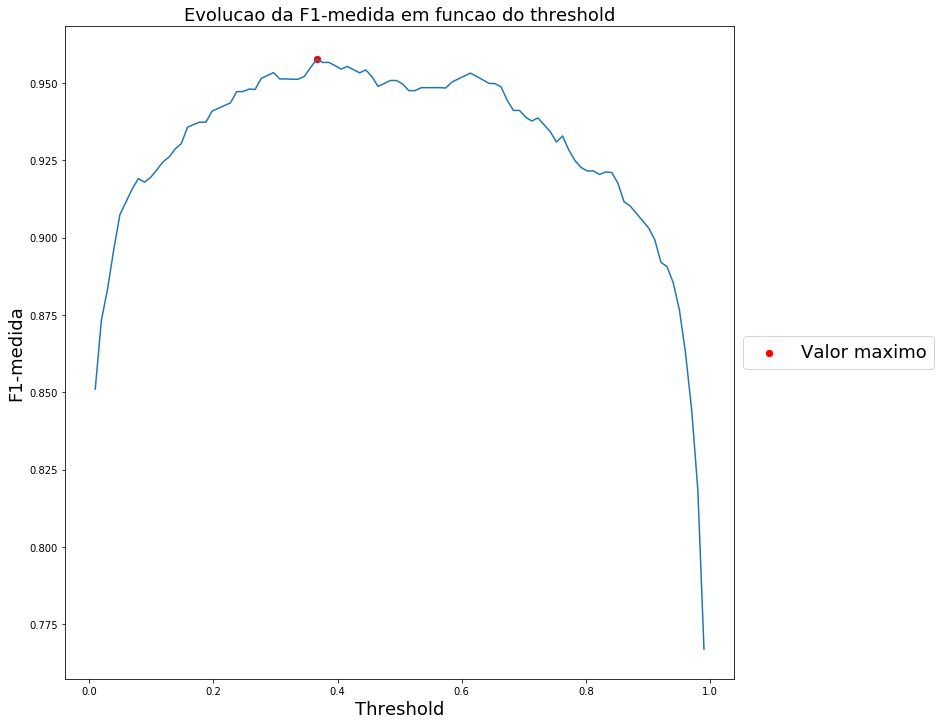

Melhor valor da F1-medida = 0.957719 para threshold = 0.366364
Precisao = 0.941973, Recall = 0.970000


In [10]:
indmax_f1 = np.argmax(f1_log) # Indice para o maximo da F1-medida
tr_log = tr[indmax_f1] # Threshold otimo

plt.figure(figsize=(12, 12))
plt.plot(tr,f1_log)
plt.title('Evolucao da F1-medida em funcao do threshold', fontsize=18)
plt.scatter(tr[indmax_f1],f1_log[indmax_f1],label='Valor maximo',color='r',s=40)
plt.xlabel('Threshold', fontsize=18)
plt.ylabel('F1-medida', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.show()

print 'Melhor valor da F1-medida = %f para threshold = %f' % (f1_log[indmax_f1],tr_log)
print 'Precisao = %f, Recall = %f'% (pr_log[indmax_f1],recall_log[indmax_f1])

Analisando as curvas ROC obtidas para os modelos de classificação, nota-se que o desempenho foi semelhante em ambos os casos, uma vez que as curvas estão muito próximas e se interceptam em diversos pontos. Os valores da área sob a curva também são semelhantes, com uma ligeira vantagem para o modelo de regressão logística. Estes resultados são reforçados ao observarmos o melhor valor da $F_1$-medida obtido para os modelos, que também são muito semelhantes, porém ligeramente melhor para o modelo de regressão logística.

A título de curiosidade, vamos exibir no espaço original dos dados as amostras e a reta separadora para os dois classificadores obtidos. Para o classificador obtido com o discriminante de Fischer, a equação da reta é dada por:

$$ \mathbf{w}_{fisc}^T\mathbf{x} = tr_{fisc} $$

onde $\mathbf{w}_{fisc}$ é o vetor da direção ótima de projeção do discriminante de Fischer, $\mathbf{x} = [x_1\ x_2]^T$ é um ponto do espaço de dados que satisfaz a equação da reta e $tr_{fisc}$ é o melhor valor do $treshold$ obtido para este classificador com respeito à $F_1$-medida. Analogamente, a equação da reta separadora para o classificador da regressão logística é dada por:

$$\hat{y} = tr_{log} \Leftrightarrow \frac{1}{1+\exp\left[-\mathbf{\Phi}(\mathbf{x})\mathbf{w}_{log}\right]} = tr_{log} \Leftrightarrow \exp\left[-\mathbf{\Phi}(\mathbf{x})\mathbf{w}_{log}\right] = \frac{1}{tr_{log}} - 1 \Leftrightarrow $$

$$\Leftrightarrow \mathbf{\Phi}(\mathbf{x})\mathbf{w}_{log} = -\log\left(\frac{1}{tr_{log}}-1\right)$$

onde $\mathbf{w}_{log}$ é o vetor de parâmetros ótimo da regressão logística, $\mathbf{\Phi}(\mathbf{x}) = [1\ x_1\ x_2]$ e $tr_{log}$ é o melhor valor do $treshold$ obtido para este classificador com respeito à $F_1$-medida.

A figura a seguir mostra os dados e as retas separadoras dos classificadores obtidos.

-0.547848848814


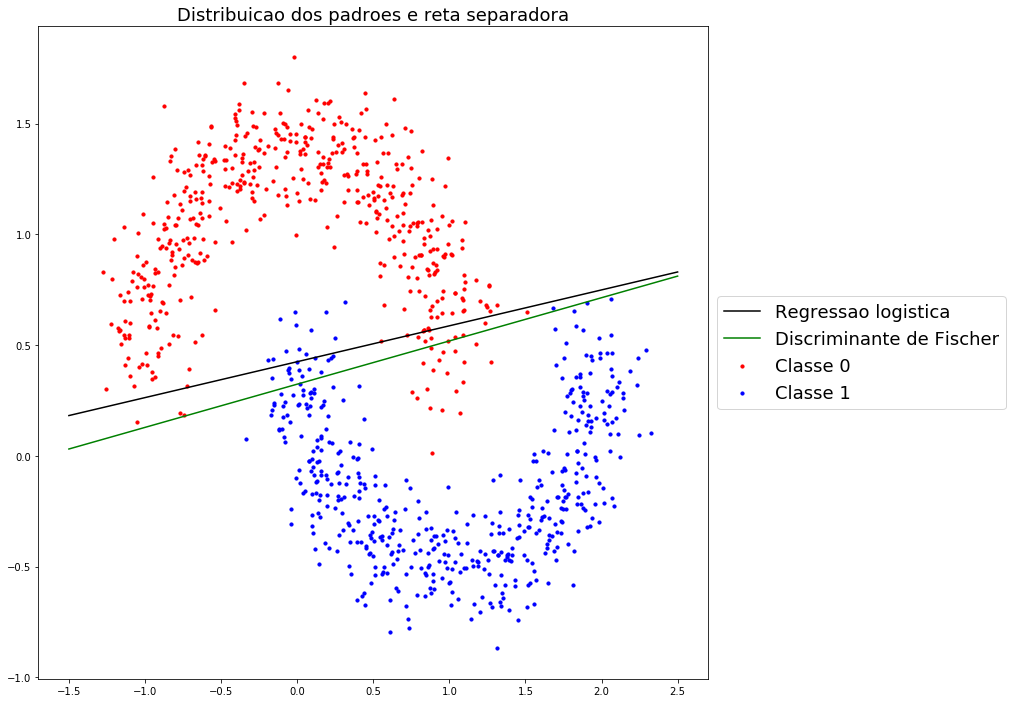

In [11]:
g = -np.log(1.0/tr_log-1)
print g

linex = np.array([-1.5,2.5])
liney_log = (g-w_opt[0]-w_opt[1]*linex)/w_opt[2]
liney_fisc = (tr_fisc-w[0]*linex)/w[1]

plt.figure(figsize=(12, 12))
plt.scatter(data[class0,0],data[class0,1],color='r',label='Classe 0',s=10)
plt.scatter(data[class1,0],data[class1,1],color='b',label='Classe 1',s=10)
plt.plot(linex,liney_log,color='k',label='Regressao logistica')
plt.plot(linex,liney_fisc,color='g',label='Discriminante de Fischer')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.title('Distribuicao dos padroes e reta separadora', fontsize=18)
plt.show()

A figura mostra retas separadoras muito próximas para os dois classificadores obtidos, assim como sugeriam os resultados já obtidos anteriormente. Observamos que a região do plano associada à classe positiva para o discriminante de Fischer contém menos pontos da classe negativa, o que explica o fato deste classificador ter obtido maior precisão (menor ocorrência de falsos positivos). Por outro lado, a região associada à classe negativa para o classificador da regressão logística tem menos pontos da classe positiva, o que explica o maior valor de *recall* obtido neste caso (menor ocorrência de falsos negativos).

### Parte 3 - Classificação multi-classe

**a)** Neste problema, iremos treinar 6 classificadores binários usando o modelo de regressão logística e a abordagem um-contra-um para distinguir as seguintes classes: (*van*,*bus*), (*van*,*saab*), (*van*,*opel*), (*bus*,*saab*), (*bus*,*opel*) e (*saab*,*opel*), nesta ordem.

Inicialmente, separamos $30\%$ das amostras de dados para o conjunto de teste, e construímos as saídas binárias para cada classificador um-contra-um. Para o classificador que distingue as classes ($i,j$), a classe $i$ é considerada positiva e a classe $j$ é considerada negativa.

In [12]:
data_vs = np.loadtxt('dataset_vehicle.csv',delimiter=',',skiprows=1,usecols=np.arange(18)) # Matriz de atributos
output = np.loadtxt('dataset_vehicle.csv',delimiter=',',skiprows=1,usecols=[18],dtype='string') # Saida

N,cols = data_vs.shape # Numero de amostras de dados e de colunas
Nclasses = 4 # Numero de classes
Nclassif = Nclasses*(Nclasses-1)/2 # Numero de classificadores um-contra-um

# Holdout

np.random.seed(10)
ind = np.random.permutation(N) # Permutacao aleatoria dos indices da matriz de dados
hold_rate = 0.3 # Porcentagem de amostras para conjunto de teste
N_test = np.int(hold_rate*N)
ind_test= ind[-np.int(N_test):] # Indices do conjunto de teste
ind_train = ind[:-np.int(N_test)] # Indices do conjunto de treinamento

# Saidas para cada conjunto
output_train = output[ind_train]
output_test = output[ind_test]

# Indices das amostras de cada classe para conjunto de treinamento
ind_class = []
ind_class.append(np.where(output_train =='van')[0])
ind_class.append(np.where(output_train =='bus')[0])
ind_class.append(np.where(output_train =='saab')[0])
ind_class.append(np.where(output_train =='opel')[0])

# Indices das amostras de cada classe para conjunto de teste
ind_class_t = []
ind_class_t.append(np.where(output_test =='van')[0])
ind_class_t.append(np.where(output_test =='bus')[0])
ind_class_t.append(np.where(output_test =='saab')[0])
ind_class_t.append(np.where(output_test =='opel')[0])

# Tamanhos das classes do conjunto de treinamento
size_class = np.zeros(Nclasses,dtype=int)
for i in np.arange(Nclasses):
    size_class[i] = len(ind_class[i])

# Saidas binarias para cada classificador um-contra-um do conj. de treinamento
out_bin = []
for i in np.arange(Nclasses):
    for j in np.arange(i+1,Nclasses):
        # Classe i = classe positiva, classe j = classe negativa
        out_bin.append(np.zeros(size_class[i]+size_class[j]))
        out_bin[-1][:size_class[i]] = 1

A função a seguir realiza a etapa de treinamento da regressão logística para um dado classificador em um conjunto de dados, como feito no exercício anterior.

In [13]:
# Etapa de treinamento da Regressao logistica

# data: matriz de atributos
# output: saida binaria
# alpha: taxa de aprendizado
# n_it: numero maximo de iteracoes
# w: amplitude da gaussiana que gera o valor inicial de w
# showPlot: opcao de mostrar o grafico de Jce ao longo do treinamento
# seed: semente do gerador aleatorio

def reg_log(data,output,alpha,n_it,w0,show_plot='False',seed=1):

    N,cols = data.shape
    phi = np.ones((N,cols+1))
    phi[:,1:] = data

    # Holdout

    np.random.seed(seed)
    ind = np.random.permutation(N) # Permutacao aleatoria dos indices da matriz de dados
    hold_rate = 0.3 # Porcentagem de amostras para conjunto de validacao
    N_val = np.int(hold_rate*N)
    ind_val = ind[-np.int(N_val):] # Indices do conjunto de validacao
    ind_train = ind[:-np.int(N_val)] # Indices do conjunto de treinamento

    w_log = np.zeros((n_it+1,cols+1))
    w_log[0] = w0*np.random.rand(cols+1) # Inicializacao do vetor w
    #w_log[0] = np.zeros(cols+1) # Inicializacao do vetor w
    #w_log[0] = np.array([2.58955987,  1.07615076, -6.93794847])
    Jce_train = np.zeros(n_it+1) # Funcao custo de treinamento
    Jce_val = np.zeros(n_it+1) # Funcao custo de validacao

    phi_train = phi[ind_train,:]
    phi_val = phi[ind_val,:]

    # Avaliacao das funcoes de custo
    Jce_train[0] = -(output[ind_train].dot(phi_train).dot(w_log[0])-np.sum(np.log(1+np.exp(phi_train.dot(w_log[0])))))/(N-N_val)
    Jce_val[0] = -(output[ind_val].dot(phi_val).dot(w_log[0])-np.sum(np.log(1+np.exp(phi_val.dot(w_log[0])))))/N_val

    # Treinamento
    for i in np.arange(n_it):

        y_hat = 1/(1+np.exp(-phi_train.dot(w_log[i]))) # Saida do modelo
        e = output[ind_train] - y_hat # erro 
        grad = -e.dot(phi_train)/(N - N_val) # vetor gradiente
        w_log[i+1] = w_log[i] - alpha*grad # atualizacao do vetor w

        # Avaliacao das funcoes de custo
        Jce_train[i+1] = -(output[ind_train].dot(phi_train).dot(w_log[i+1])-np.sum(np.log(1+np.exp(phi_train.dot(w_log[i+1])))))/(N-N_val)
        Jce_val[i+1] = -(output[ind_val].dot(phi_val).dot(w_log[i+1])-np.sum(np.log(1+np.exp(phi_val.dot(w_log[i+1])))))/N_val

    indmin_val = np.argmin(Jce_val)
    w_opt = w_log[indmin_val]
    
    if(show_plot == 'True'):
        
        plt.figure(figsize=(12, 12))
        plt.plot(Jce_train,label='Treinamento')
        plt.plot(Jce_val,label='Validacao')
        plt.title('Evolucao da funcao de custo ao longo das iteracoes', fontsize=18)
        plt.scatter(indmin_val,Jce_val[indmin_val],color='r',marker='x',label='Minimo custo de validacao')
        plt.xlabel('Iteracao', fontsize=18)
        plt.ylabel('Funcao custo', fontsize=18)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
        plt.show()

        print 'Minimo da funcao custo de validacao = %f obtido na iteracao %d' %(Jce_val[indmin_val],indmin_val)
        
    return w_opt, Jce_val[indmin_val], indmin_val

A função a seguir retorna o valor da função discriminante de um dado classificador para as amostras do conjunto de teste.

In [14]:
# Funcao discriminante do classificador da regressao logistica

# data: matriz de atributos
# w: vetor de parametros da reg. log.

def class_log(data,w): # Threshold padrao: 0.5
    
    N,cols = data.shape
    phi = np.ones((N,cols+1))
    phi[:,1:] = data
    
    y_hat = 1/(1+np.exp(-phi.dot(w))) # Saida do modelo
    
    return y_hat

A seguir, realizamos o treinamento para os 6 classificadores um-contra-um, com taxa de aprendizado $1{,}0{\cdot}10^{-5}, 2{,}0{\cdot}10^{-5}$ ou $2{,}0{\cdot}10^{-8}$ dependendo do classificador, executando por $10^{7}$ iterações. O arquivo *"w_multiclass.out"* contém os valores de $\mathbf{w}$ obtidos ao final do treinamento, para evitar a repetição do mesmo em futuras execuções, visto o longo tempo de treinamento.

In [15]:
try:
    w_vs = np.loadtxt('w_multiclass_1e7it.out', delimiter=',') # Arquivo com os valores finais de w após o treinamento
    
except IOError: # Caso o arquivo nao exista, realiza o treinamento
    
    seed = 1
    alpha = 1e-5*np.array([2,2,2,1,1,2e-3]) # Taxa de aprendizado para cada classificador
    n_it = int(1e7)*np.ones(Nclassif,dtype=int) # Numero de iteracoes para cada classificador
    w0 = 1e-3 # Amplitude da gaussiana inicial para w
    show_plot = 'False' # Opcao de mostrar o grafico de Jce

    w_vs = np.zeros((Nclassif,cols+1))
    k = 0 # Contador de classificadores
    for i in np.arange(Nclasses):
        for j in np.arange(i+1,Nclasses):
            ind_classif = ind_train[np.concatenate((ind_class[i],ind_class[j]))] # Indices das amostras de cada classificador
            print 'Iniciando treinamento do classificador %d...' % (k+1)
            w_vs[k], Jce, it = reg_log(data_vs[ind_classif],out_bin[k],alpha[k],n_it[k],w0,show_plot,seed)
            print 'Treinamento finalizado para o classificador %d. Custo minimo: %f na iteracao %d.' % (k+1,Jce,it)
            k = k + 1
            
    np.savetxt('w_multiclass_1e7it',w_vs, delimiter=',')

Por fim, avaliamos os classificadores obtidos ao submetê-los às amostras de teste. O mecanismo de desambiguação adotado para a tomada de decisão final realiza uma soma de votos de acordo com os valores das funções discriminantes $f(\mathbf{x},\mathbf{w})$ obtidas para cada classificador, onde $\mathbf{x}$ é uma amostra de dados. Para o classificador que distingue as classes ($i$,$j$), com vetor de parâmetros $\mathbf{w}_{ij}$, cada amostra $\mathbf{x}$ contribui com um voto de valor $f(\mathbf{x},\mathbf{w}_{ij})$ para a classe $i$ e de valor $1 - f(\mathbf{x},\mathbf{w}_{ij})$ para a classe $j$. Ao final da contagem de votos, cada amostra será atribuída à classe com o maior valor de votos.

Após a decisão final, obtemos a matriz de confusão e calculamos as métricas de precisão e *recall* para cada classe. Em seguida, aplicamos a *macro-avering* destas métricas, conforme [1], calculando a média aritmética das métricas para obter precisão$_M$ e *recall*$_M$. Finalmente, avaliamos a $F_1$-medida$_M$ com as médias obtidas.

In [16]:
# Tomada de decisao final

fdisc = np.zeros((Nclassif,N_test)) # Funcao discriminante

k = 0 # Contador de classificadores
for i in np.arange(Nclasses):
    for j in np.arange(i+1,Nclasses):
        fdisc[k] = class_log(data_vs[ind_test],w_vs[k])
        k = k + 1
    
# Contagem de votos com desambiguacao

votes = np.zeros((N_test,Nclasses))
k = 0 # Contador de classificadores
for i in np.arange(Nclasses):
    for j in np.arange(i+1,Nclasses):
        votes[:,i] = votes[:,i] + fdisc[k]
        votes[:,j] = votes[:,j] + 1 - fdisc[k]
        k = k + 1

# Escolha da classe para o voto majoritario das somas das funcoes discriminantes
decision = np.array([np.argmax(votes[j]) for j in range(N_test)])

In [17]:
# Avaliacao do classificador da regressao logistica
from collections import Counter

# decision: classe atribuida pelo classificador para cada amostra
# ind_class_t: lista de indices de cada classe para as amostras de teste
def eval_classif(decision,ind_class_t):
    
    Nclasses = len(ind_class_t)

    conf = np.zeros((Nclasses,Nclasses),dtype=int) # Matriz de confusao

    for i in np.arange(Nclasses):
        c = Counter(decision[ind_class_t[i]].tolist())
        for j in np.arange(Nclasses):
            conf[i,j] = c[j]

    # Avaliacao global

    precision = 0.0
    recall = 0.0
    for i in np.arange(Nclasses):
        TP = conf[i,i]
        FN = sum(conf[i,:]) - TP
        FP = sum(conf[:,i]) - TP
        precision = precision + float(TP) / (TP + FP)
        recall = recall + float(TP) / (TP + FN)

    precision = precision / Nclasses
    recall = recall / Nclasses

    f1 = 2*precision*recall/(precision+recall)
    
    return conf, precision, recall, f1
    
# Exibe a avaliacao do classificador obtido
conf, precision, recall, f1 = eval_classif(decision,ind_class_t)

print 'Matriz de confusao: \nvan bus saab opel\n', conf

print 'Precisao: ', precision
print 'Recall: ', recall
print 'F1-medida: ',f1

Matriz de confusao: 
van bus saab opel
[[59  1  3  0]
 [ 2 55  1  0]
 [ 0  3 61  3]
 [ 1  1 54  9]]
Precisao:  0.782721152977
Recall:  0.733423274558
F1-medida:  0.757270746318


De modo geral, o classificador obteve bons resultados, com um valor de $F_1$-medida$_M$ em torno de $78\%$. O desempenho médio da métrica de precisão é superior ao da métrica de *recall*, o que mostra que o classificador apresentou maior ocorrência de falsos-negativos do que de falsos positivos. Observando a matriz de confusão, podemos constatar esse fato ao ver que a maior parte das amostras da classe *opel* não foi classificada corretamente, em sua maioria sendo atribuídas à classe *saab*. O classificador que distingue essas duas classes deve ter tido dificuldades em separá-las corretamente, pois os veículos destes tipos possuem características muito semelhantes. Para as demais classes, a maior parte das amostras é classificada corretamente.

**b)** A seguir, implementamos a técnica *k-nearest neighbors* para valores de $k$ variando de 1 até uma unidade a menos do que o número de amostras do conjunto de teste. A contribuição de cada vizinho à decisão final é ponderada pelo inverso da distância entre as amostras somada de uma unidade. Para cada valor de $k$, exibimos a matriz de confusão, e ao final exibimos o valor da $F_1$-medida$_M$ em função de $k$.

In [18]:
# Calculo das distancias

# dist(i,j) = distancia entre a i-esima amostra de teste e a j-esima amostra de treinamento
dist = np.zeros((N_test,N-N_test)) 

for i in np.arange(N_test):
    for j in np.arange(N-N_test):
        # Distancia euclidiana
        dist[i,j] = np.sqrt(np.sum((data_vs[ind_test[i]] - data_vs[ind_train[j]])**2))
        
ind_neigh = np.argsort(dist,axis=1) # indices dos vizinhos em ordem crescente de distancia
dist_neigh = np.array([dist[i,ind_neigh[i]] for i in range(N_test)]) # distancias ordenadas

classes_train = np.zeros(N - N_test) # classes das amostras de treinamento
for c in np.arange(Nclasses):
    classes_train[ind_class[c]] = c
    
classes_neigh = classes_train[ind_neigh] # classes dos vizinhos mais proximos

In [19]:
# k-nearest neighbors

# classes_neig: classes dos vizinhos mais proximos
# dist_neigh: distancias ordenadas
# Nclasses: numero de classes
def k_nearest_neighbors(k,classes_neigh,dist_neigh,Nclasses):
    
    N_test = classes_neigh.shape[0]
    k_classes = classes_neigh[:,:k] # classes dos k-vizinhos mais proximos a cada amostra
    k_dist = dist_neigh[:,:k] # distancias dos k-vizinhos mais proximos a cada amostra
    
    votes = np.zeros((N_test,Nclasses)) # votos das classes para cada amostra
    
    # soma de votos para cada classe
    for c in np.arange(Nclasses):
        votes[:,c] = votes[:,c] + ((k_classes == c)/(k_dist+1)).sum(axis=1) # votos ponderados pelo inverso da distancia+1
    
    # retorna classe com maior voto para cada amostra
    return votes.argmax(axis=1)  

In [20]:
# Variando os valores de k

k_values = np.arange(1,N_test) # Intervalo de valores para k: de 1 até N_test-1
N_kvalues = len(k_values)

conf = np.zeros((N_kvalues,Nclasses,Nclasses),dtype=int)
precision = np.zeros(N_kvalues)
recall = np.zeros(N_kvalues)
f1 = np.zeros(N_kvalues)

for k in k_values:
    
    decision = k_nearest_neighbors(k,classes_neigh,dist_neigh,Nclasses)
    conf[k-1], precision[k-1], recall[k-1], f1[k-1] = eval_classif(decision,ind_class_t)
    
    print 'k = ', k
    print 'Matriz de confusao: \nvan bus saab opel\n', conf[k-1]
    print '\n'


k =  1
Matriz de confusao: 
van bus saab opel
[[58  1  2  2]
 [ 2 50  3  3]
 [ 1  6 32 28]
 [ 6  4 34 21]]


k =  2
Matriz de confusao: 
van bus saab opel
[[58  1  2  2]
 [ 2 50  3  3]
 [ 1  6 32 28]
 [ 6  4 34 21]]


k =  3
Matriz de confusao: 
van bus saab opel
[[60  0  2  1]
 [ 3 47  5  3]
 [ 2  6 35 24]
 [ 8  4 31 22]]


k =  4
Matriz de confusao: 
van bus saab opel
[[61  0  2  0]
 [ 2 49  3  4]
 [ 3  5 34 25]
 [ 6  4 31 24]]


k =  5
Matriz de confusao: 
van bus saab opel
[[62  0  1  0]
 [ 2 47  6  3]
 [ 3  5 34 25]
 [ 6  5 28 26]]


k =  6
Matriz de confusao: 
van bus saab opel
[[62  1  0  0]
 [ 1 49  6  2]
 [ 4  8 34 21]
 [ 6  6 29 24]]


k =  7
Matriz de confusao: 
van bus saab opel
[[61  2  0  0]
 [ 1 46  7  4]
 [ 4  8 35 20]
 [ 7  6 30 22]]


k =  8
Matriz de confusao: 
van bus saab opel
[[61  2  0  0]
 [ 1 46  7  4]
 [ 5  6 37 19]
 [ 6  5 30 24]]


k =  9
Matriz de confusao: 
van bus saab opel
[[60  3  0  0]
 [ 1 46  6  5]
 [ 5  8 40 14]
 [ 6  6 34 19]]


k =  10
Matriz de c

k =  151
Matriz de confusao: 
van bus saab opel
[[53 10  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [14 14 20 17]]


k =  152
Matriz de confusao: 
van bus saab opel
[[53 10  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [14 14 20 17]]


k =  153
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [14 14 20 17]]


k =  154
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [13 15 20 17]]


k =  155
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [14 14 20 17]]


k =  156
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 13 20 24]
 [14 14 20 17]]


k =  157
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [13 15 20 17]]


k =  158
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 12 21 24]
 [12 16 20 17]]


k =  159
Matriz de confusao: 
van bus saab opel
[[52 11  0  0]
 [ 0 45  9  4]
 [10 14 19 24]
 [12 16 20 17]]


k

k =  237
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 16 24]
 [11 18 20 16]]


k =  238
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 16 24]
 [11 18 20 16]]


k =  239
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 16 24]
 [11 19 18 17]]


k =  240
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 49  5  4]
 [ 7 20 16 24]
 [11 19 18 17]]


k =  241
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 16 24]
 [11 19 19 16]]


k =  242
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 16 24]
 [11 19 19 16]]


k =  243
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 16 24]
 [11 19 19 16]]


k =  244
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 20 17 23]
 [11 19 19 16]]


k =  245
Matriz de confusao: 
van bus saab opel
[[40 23  0  0]
 [ 0 48  6  4]
 [ 7 21 16 23]
 [11 19 19 16]]


k

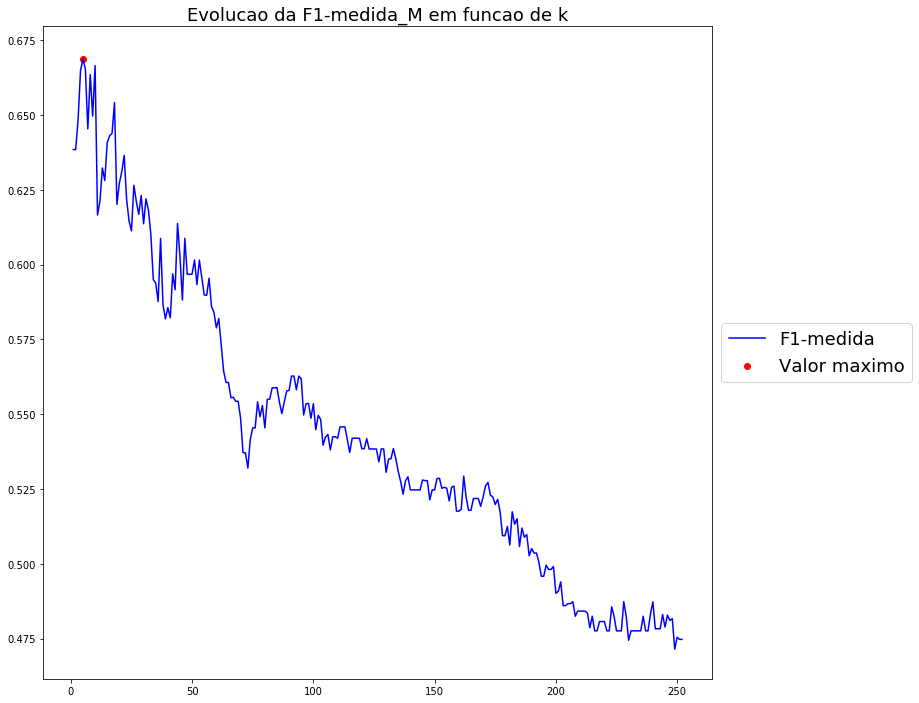

Melhor valor da F1-medida_M = 0.668688 obtido para k = 5


In [21]:
ind_maxf1 = np.argmax(f1)

plt.figure(figsize=(12, 12))
#plt.plot(k_values,precision,color='k',label='Precisao')
#plt.plot(k_values,recall,color='r',label='Recall')
plt.plot(k_values,f1,color='b',label='F1-medida')
plt.scatter(ind_maxf1+1,f1[ind_maxf1],color='r',label='Valor maximo')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.title('Evolucao da F1-medida_M em funcao de k', fontsize=18)
plt.show()

print 'Melhor valor da F1-medida_M = %f obtido para k = %d' %(f1[ind_maxf1],ind_maxf1+1)

Analisando as matrizes de confusão obtidas, nota-se de forma geral que a ocorrência de falsos negativos para a classe *opel* é alta. Para valores pequenos de $k$, a maior parte das amostras desta classe é confundida com a classe *saab*, assim como no classificador da regressão logística. Conforme $k$ aumenta, entretanto, algumas amostras desta classe passam a ser atribuídas a outras classes também. A incidência de erros de classificação para as demais classes também aumenta com o valor de $k$. 

Este resultado também é observado no gráfico da evolução do valor da $F_1$-medida$_M$: de forma geral, o desempenho do classificador com relação a essa métrica decresce com o valor de $k$, com algumas oscilações. Uma possível explicação para este comportamento é o fato de que quanto maior o valor de $k$, maior a chance de que vizinhos muito distantes e pouco relacionados à amostra em questão exerçam influência na decisão final. No entanto, o melhor desempenho do classificador, segundo essa métrica, ocorre para $k=5$, o que sugere que valores muito pequenos de $k$ também induzem a erros de classificação, uma vez que o classificador tende a criar mais regiões isoladas que contribuem para diminuir sua capacidade de generalização.

## Referências

[1] M. SOKOLOVA &G.LAPALME,A   Systematic   Analysis   of Performance  Measures  for  Classification  Tasks. Information  Processing  & Management, vol. 45, no. 4, pp. 427-437, 2009.